In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

In [15]:
def get_points(a, b, n, mode):
    if mode == 'uniform':
        points = np.linspace(a, b, n)
    elif mode == 'random':
        points = np.sort(np.random.rand(n) * (b - a) + a)
    elif mode == 'chebyshev':
        points = (np.polynomial.chebyshev.chebpts1(n) + 1) / 2 * (b - a) + a
    else:
        print(f'incorrect mode {mode}')
        points = 0
    return points

In [16]:
def plot(f1, f2, a, b, name):
    #a = a - 1
    #b = b + 1
    plot_points = get_points(a, b, int(100 * (b - a)), 'uniform')
    plt.plot(plot_points, f1(plot_points), label='interpolation')
    plt.plot(plot_points, f2(plot_points), label='function')
    plt.title(name)
    plt.legend()
    plt.grid()
    plt.show()

In [161]:
def divided_differences(n, p, f):
    matrix = np.zeros((n, n))
    for i in range(n):
        matrix[i][0] = f(p[i])
        for j in range(1, i + 1):
            matrix[i][j] = (matrix[i][j - 1] - matrix[i - 1][j - 1]) / (p[i] - p[i - j])
    return matrix

In [173]:
def newton_interpol(n, a, b, f, mode, verbose=False):
    n = n + 1
    points = get_points(a, b, n, mode)
    diff = divided_differences(n, points, f)
    poly = Polynomial([diff[0][0]])
    for i in range(1, n):
        poly += diff[i][i] * Polynomial.fromroots(points[:i])
    if verbose:
        print(poly)
    plot(poly, f, a, b, 'Newton ' + mode)

In [174]:
f = np.abs

0.0 - (6.10622664e-16) x + 6.45634921 x**2 + (9.32587341e-15) x**3 -
41.2808642 x**4 - (5.68434189e-14) x**5 + 128.39988426 x**6 +
(9.9475983e-14) x**7 - 167.92741402 x**8 - (5.68434189e-14) x**9 +
75.35204475 x**10


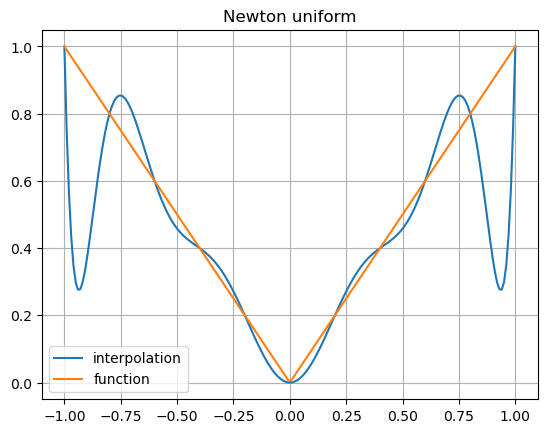

0.0 - (2.22044605e-16) x + 4.80651079 x**2 + (2.22044605e-15) x**3 -
18.73894592 x**4 - (8.8817842e-15) x**5 + 39.50721068 x**6 +
(1.77635684e-14) x**7 - 38.22893863 x**8 - (5.32907052e-15) x**9 +
13.66697858 x**10


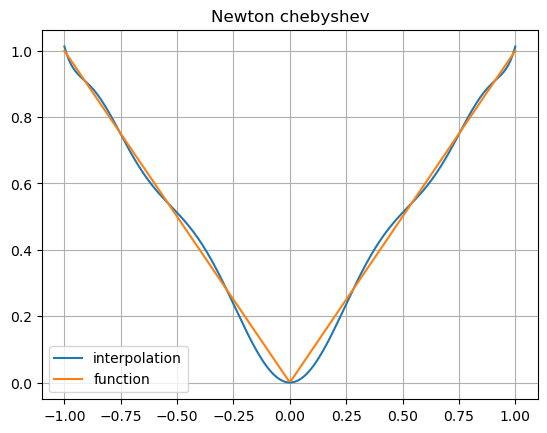

In [175]:
newton_interpol(10, -1, 1, f, 'uniform', True)
newton_interpol(10, -1, 1, f, 'chebyshev', True)

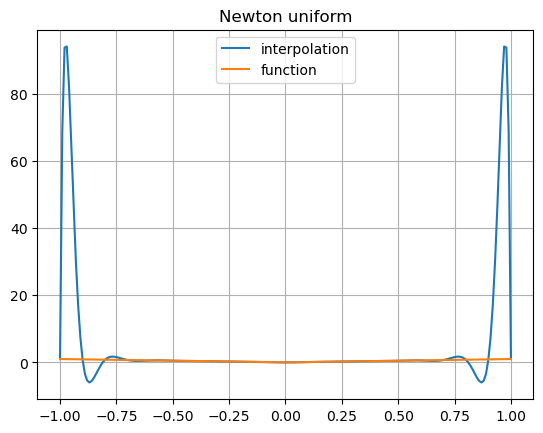

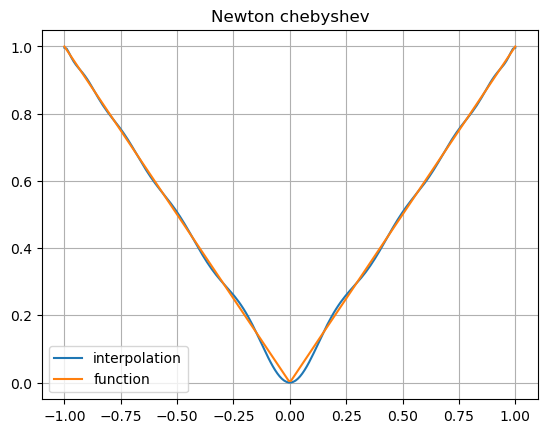

In [177]:
newton_interpol(20, -1, 1, f, 'uniform')
newton_interpol(20, -1, 1, f, 'chebyshev')